<a href="https://colab.research.google.com/github/briandrichey/Green-Eggs-and-Ham/blob/main/HamRadio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/'; 

In [ ]:
import pandas as pd
#pandas_data = pd.read_csv("gdrive/MyDrive/ham_data.csv", sep = ",",names=list(range(11))) 
pandas_data = pd.read_csv("gdrive/MyDrive/ham_data.csv", sep = ",",names=['date','time','base', 'txrx', 'encoding', 'signal_strength', 'timedelay','offset','rxcall','txcall','message']) 

In [ ]:
pandas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659914 entries, 0 to 659913
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             659914 non-null  int64  
 1   time             659914 non-null  int64  
 2   base             659914 non-null  float64
 3   txrx             659914 non-null  object 
 4   encoding         659914 non-null  object 
 5   signal_strength  659914 non-null  int64  
 6   timedelay        659914 non-null  float64
 7   offset           659914 non-null  int64  
 8   rxcall           659914 non-null  object 
 9   txcall           659881 non-null  object 
 10  message          655506 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 55.4+ MB


In [ ]:
pandas_data.describe()

,date,time,base,signal_strength,timedelay,offset
count,659914.000000,659914.000000,659914.000000,659914.000000,659914.000000,659914.000000
mean,210533.577539,197402.538488,16.992754,-7.284467,0.187027,1451.856948
std,70.635656,25507.488314,3.698477,9.156802,0.463300,682.661424
min,210422.000000,0.000000,2.223000,-24.000000,-2.600000,98.000000
25%,210504.000000,182330.000000,14.074000,-14.000000,0.000000,900.000000
50%,210519.000000,201915.000000,18.100000,-8.000000,0.200000,1430.000000
75%,210608.000000,214015.000000,18.100000,-1.000000,0.400000,1983.000000
max,210625.000000,235952.000000,50.318000,77.000000,2.500000,3633.000000


In [ ]:
pandas_data.iloc[0]

date               210422
time               164145
base                7.074
txrx                   Rx
encoding              FT8
signal_strength       -13
timedelay             0.1
offset                103
rxcall                 CQ
txcall              W0WND
message              DM97
Name: 0, dtype: object

In [ ]:
import numpy as np
dat = pandas_data['date'] 
year = np.zeros(np.array(dat).size)
month = np.zeros(np.array(dat).size)
day = np.zeros(np.array(dat).size)
for i in range(np.array(dat).size):
    year[i] = int(str(dat[i])[0:2]) 
    month[i] = int(str(dat[i])[2:4])
    day[i] = int(str(dat[i])[4:6])

In [ ]:
tim = pandas_data['time'] 
hour = np.zeros(np.array(tim).size)
minutes = np.zeros(np.array(tim).size)
seconds = np.zeros(np.array(tim).size)
for i in range(np.array(tim).size): 
  if(len(str(tim[i]))== 6): 
    hour[i] = int(str(tim[i])[0:2]) 
    minutes[i] = int(str(tim[i])[2:4]) 
    seconds[i] = int(str(tim[i])[4:6])

In [ ]:
base_freq = np.array(pandas_data['base'] ) 
#signal = np.array(pandas_data['signal_strength'][pandas_data['signal_strength'] < 25]) 
signal = np.array(pandas_data['signal_strength'])
time_delay = np.array(pandas_data['timedelay'])
freq_offset = np.array(pandas_data['offset']/1000)

In [ ]:
pandas_data_2 = pd.read_csv("gdrive/MyDrive/ham_data_2.csv", encoding='latin-1') 

In [ ]:
pandas_data_2.describe()

,Line,Date(yymmdd),Date(yyymmdd),Date(yyymmdd).1,Time(24),Frequency(MHz),Receive Strength,Delta Time,Frequency Offset (kHz)
count,659914.000000,659914.000000,6.599140e+05,6.599140e+05,659914.000000,659914.000000,659914.000000,659914.000000,659914.000000
mean,329957.500000,210533.577539,2.021053e+07,2.021053e+07,197402.538488,16.992754,-7.284467,0.187027,1451.856948
std,190500.907108,70.635656,7.063566e+01,7.063566e+01,25507.488314,3.698477,9.156802,0.463300,682.661424
min,1.000000,210422.000000,2.021042e+07,2.021042e+07,0.000000,2.223000,-24.000000,-2.600000,98.000000
25%,164979.250000,210504.000000,2.021050e+07,2.021050e+07,182330.000000,14.074000,-14.000000,0.000000,900.000000
50%,329957.500000,210519.000000,2.021052e+07,2.021052e+07,201915.000000,18.100000,-8.000000,0.200000,1430.000000
75%,494935.750000,210608.000000,2.021061e+07,2.021061e+07,214015.000000,18.100000,-1.000000,0.400000,1983.000000
max,659914.000000,210625.000000,2.021062e+07,2.021062e+07,235952.000000,50.318000,77.000000,2.500000,3633.000000


In [ ]:
from sklearn import preprocessing 

X_processed_data = {'hour': hour.astype(int), 'minute': minutes.astype(int), 'seconds': seconds.astype(int),
                  'rs' : signal, 'dt' : time_delay}



In [ ]:
X = pd.DataFrame(X_processed_data)
print('\nprocessed inputs = \n', X)




processed inputs = 
         hour  minute  seconds  rs   dt
0         16      41       45 -13  0.1
1         16      42        0 -10  1.0
2         16      42       15  -4  0.2
3         16      42       15 -12  0.1
4         16      42       15 -22  0.5
...      ...     ...      ...  ..  ...
659909    23      37       52  -7  0.6
659910    23      37       52   3  0.3
659911    23      38        0   0  0.0
659912    23      37       52 -12  0.3
659913    23      37       52  -5  0.6

[659914 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

y = base_freq.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier() 
# model = DecisionTreeClassifier() #selection du modele voulu
model.fit(X_train, y_train)

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

                    precision    recall  f1-score   support

10.136000000000001       0.41      0.48      0.44      8330
            10.137       0.31      0.27      0.29       204
             10.14       0.10      0.05      0.07        19
             14.07       0.00      0.00      0.00         1
            14.071       0.00      0.00      0.00         0
14.074000000000002       0.46      0.52      0.49     35856
            14.075       0.73      0.71      0.72       108
            14.079       0.37      0.36      0.36        70
             14.08       0.60      0.58      0.59      5655
              15.0       0.00      0.00      0.00         2
             17.04       0.00      0.00      0.00         0
            18.098       0.15      0.17      0.16       454
            18.099       0.31      0.32      0.32       194
              18.1       0.60      0.58      0.59     56077
            18.102       0.00      0.00      0.00         0
            18.104       0.20      0.12

0.4987915110279354

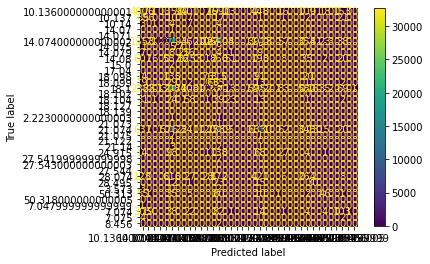

In [ ]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm

print(classification_report(y_test, predictions, labels=model.classes_))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
accuracy_score(predictions, y_test)